# 🧠 CELL 1 — Imports  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from pathlib import Path
import sys


# 🧠 CELL 2 — Set project root & import preprocess function

In [2]:
import sys
from pathlib import Path

# Go 2 levels up from notebook to reach project root
PROJECT_ROOT = Path().resolve().parents[1]

print("Project Root:", PROJECT_ROOT)

# Add root and scripts folder to Python path
sys.path.append(str(PROJECT_ROOT))
sys.path.append(str(PROJECT_ROOT / "scripts"))


Project Root: C:\College-Work\Projects\AEGIS-XAI-NIDS


In [3]:
from aegis.data.preprocess.preprocess import preprocess_dataframe
from scripts.run_preprocess import load_dataset


# 🧠 CELL 3 — Choose Dataset

In [4]:
DATASET = "unsw"   # "cicids" or "unsw" or "botiot"
print(f"Dataset selected: {DATASET}")


Dataset selected: unsw


# 🧠 CELL 4 — Load the dataset

In [5]:
df = load_dataset(DATASET)
print("Loaded shape:", df.shape)
df.head()


[+] Loading UNSW CSV: C:\College-Work\Projects\AEGIS-XAI-NIDS\aegis\data\raw\UNSW-NB15\UNSW_NB15_training.csv
Loaded shape: (82332, 41)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,1,3,0,0,0,2,3,0,Normal,0


# 🧠 CELL 5 — Preprocess

In [6]:
X_train, X_test, y_train, y_test = preprocess_dataframe(df)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


[+] Using label column: label

[DEBUG] Numeric columns detected: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
[DEBUG] Number of numeric cols: 40
X_train: (65865, 40)
X_test: (16467, 40)
y_train: (65865,)
y_test: (16467,)


# 🧠 CELL 6 — Train Logistic Regression

In [7]:
lr = LogisticRegression(max_iter=500, n_jobs=-1)
lr.fit(X_train, y_train)

print("Logistic Regression Training Done.")


Logistic Regression Training Done.


# 🧠 CELL 7 — LR Metrics

In [8]:
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.883888990101415
Precision: 0.8841136793325248
Recall: 0.883888990101415
F1 Score: 0.8835717182043559


# 🧠 CELL 8 — Confusion Matrix Heatmap (Visual)

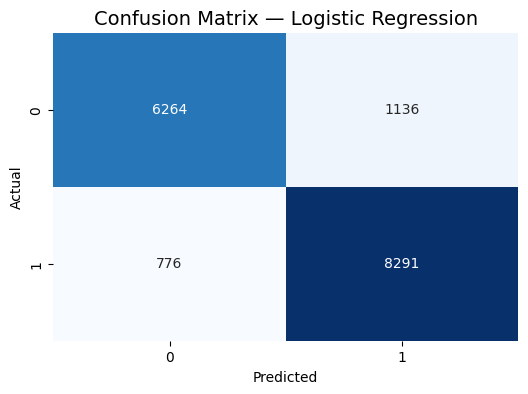

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix — Logistic Regression", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🧠 CELL 9 — Train Random Forest

In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("Random Forest Training Done.")


Random Forest Training Done.


# 🧠 CELL 10 — RF Metrics

In [11]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.9760733588388899
Precision: 0.9761368171121511
Recall: 0.9760733588388899
F1 Score: 0.976084128689765


# 🧠 CELL 11 — RF Confusion Matrix Heatmap

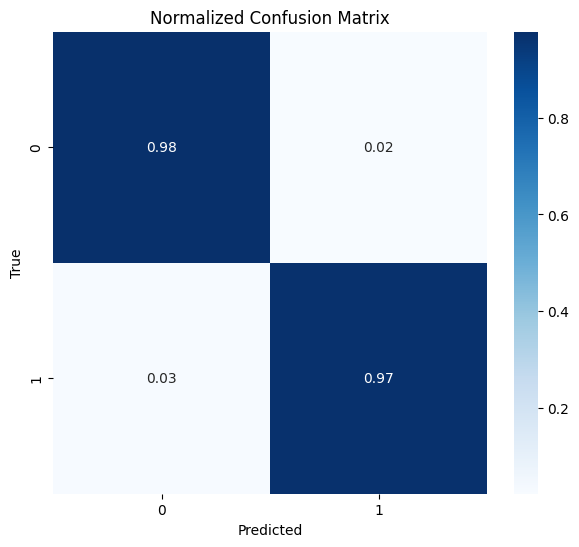

In [12]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def cross_validate_model(model, X, y, n_splits=5):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=42
    )

    acc_scores = []
    f1_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)

        acc_scores.append(accuracy_score(y_val, preds))
        f1_scores.append(
            f1_score(y_val, preds, average="weighted", zero_division=0)
        )

    return {
        "accuracy_mean": np.mean(acc_scores),
        "accuracy_std": np.std(acc_scores),
        "f1_mean": np.mean(f1_scores),
        "f1_std": np.std(f1_scores)
    }


In [14]:
print("Running Cross-Validation...")

lr_cv = cross_validate_model(lr, X_train, y_train)
rf_cv = cross_validate_model(rf, X_train, y_train)

print("Logistic Regression CV:", lr_cv)
print("Random Forest CV:", rf_cv)


Running Cross-Validation...
Logistic Regression CV: {'accuracy_mean': np.float64(0.8776892127837244), 'accuracy_std': np.float64(0.0033814553191718706), 'f1_mean': np.float64(0.8774086017958902), 'f1_std': np.float64(0.003373732341126911)}
Random Forest CV: {'accuracy_mean': np.float64(0.9765277461474227), 'accuracy_std': np.float64(0.0008181701106996108), 'f1_mean': np.float64(0.9765374553814062), 'f1_std': np.float64(0.0008146551915394492)}


In [15]:
import joblib

joblib.dump(lr, f"{DATASET}_logistic_model.joblib")
joblib.dump(rf, f"{DATASET}_rf_model.joblib")

print("Models saved successfully.")


Models saved successfully.


In [16]:
import pandas as pd

baseline_results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, lr.predict(X_test)),
        "Precision": precision_score(y_test, lr.predict(X_test), average="weighted", zero_division=0),
        "Recall": recall_score(y_test, lr.predict(X_test), average="weighted", zero_division=0),
        "F1": f1_score(y_test, lr.predict(X_test), average="weighted", zero_division=0)
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, rf.predict(X_test)),
        "Precision": precision_score(y_test, rf.predict(X_test), average="weighted", zero_division=0),
        "Recall": recall_score(y_test, rf.predict(X_test), average="weighted", zero_division=0),
        "F1": f1_score(y_test, rf.predict(X_test), average="weighted", zero_division=0)
    }
])

baseline_results


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.884375,0.884678,0.884375,0.884032
1,Random Forest,0.974069,0.974111,0.974069,0.974078


In [17]:
import json
import os

metrics_payload = {
    "dataset": DATASET,
    "logistic_regression": {
        "test_metrics": {
            "accuracy": baseline_results.iloc[0]["Accuracy"],
            "precision": baseline_results.iloc[0]["Precision"],
            "recall": baseline_results.iloc[0]["Recall"],
            "f1": baseline_results.iloc[0]["F1"]
        },
        "cv_metrics": lr_cv
    },
    "random_forest": {
        "test_metrics": {
            "accuracy": baseline_results.iloc[1]["Accuracy"],
            "precision": baseline_results.iloc[1]["Precision"],
            "recall": baseline_results.iloc[1]["Recall"],
            "f1": baseline_results.iloc[1]["F1"]
        },
        "cv_metrics": rf_cv
    }
}

os.makedirs("metrics", exist_ok=True)

with open(f"metrics/{DATASET}_task2_metrics.json", "w") as f:
    json.dump(metrics_payload, f, indent=4)

print("Task-2 metrics saved successfully.")


Task-2 metrics saved successfully.
